## Pengenalan Computer Vision

Computer vision merupakan bidang yang memungkinkan komputer atau sistem memperoleh informasi dari gambar digital, video, dan input visual lainnya.
Pendekatan machine learning mengajarkan komputer untuk mengenali suatu objek dalam gambar dengan memberikan banyak data gambar beserta labelnya (solusi yang benar). 

---
Misalnya, pada permasalahan klasifikasi hewan, kita akan menunjukkan kepada komputer banyak gambar hewan seperti burung, kelinci, kucing, dan sebagainya. Dengan data pelatihan seperti itu, komputer belajar cara mengklasifikasikan gambar yang belum pernah ditemui sebelumnya. 

---
Dengan cara di atas, proses pengenalan dan klasifikasi gambar tentu jadi lebih mudah dan cepat.

## Penerapan Computer Vision di Industri

### Kesehatan
Dengan computer vision, tenaga medis dapat menafsirkan citra sinar-X, CT scan, MRI, dan citra mikroskopis secara lebih akurat. Meskipun computer vision tidak akan sepenuhnya menggantikan tenaga kesehatan, ia cukup berperan dalam melengkapi diagnosis untuk pasien. 

### Autonomous Driving
Berbagai arsitektur model machine learning diterapkan dalam self-driving cars, merentang dari kategori supervised, unsupervised, hingga reinforcement learning. Sebagai contoh, model Convolutional Neural Network dengan contoh arsitektur LeNet, AlexNet, ResNet, dan LSTM digunakan sebagai analisis data spasial, deteksi objek, dan lokalisasi. 

Sementara itu, model Generative Adversarial Network (GAN) digunakan untuk menghasilkan simulasi mengemudi secara virtual dan membantu model supervised learning. Sedangkan, teknik reinforcement learning digunakan sebagai sistem kontrol dalam mengemudi, manajemen, dan sistem pengambilan keputusan berbasis AI.

Menarik, bukan? Beberapa arsitektur yang disebutkan tadi terdengar familier, ya? Saat ini Anda sedang belajar mengenai computer vision. Kelak, siapa tahu Anda terlibat dalam proyek pengembangan self-driving car. Semoga!

### Facial Recognition System
Sistem pengenalan wajah merupakan salah satu penerapan bidang computer vision yang telah digunakan secara luas. Ia bekerja dengan memetakan, menganalisis, dan mengonfirmasi identitas wajah dalam berbagai gambar digital (foto atau video). Sebagian besar dari kita telah lama menggunakannya dalam kehidupan sehari-hari, misalnya saat membuka kunci ponsel, maupun pada fitur penanda (tagging) di media sosial. 

---







# Membangun Model Klasifikasi Rambu Lalu Lintas
Pada proyek kali ini, kita akan membuat model machine learning terkait dengan penerapan computer vision pada self-driving cars. Kita akan membuat model klasifikasi gambar dengan data berupa rambu-rambu lalu lintas.

---

## Dataset German Trafic Sign
[German Traffic Sign Dataset](https://www.kaggle.com/datasets/saadhaxxan/germantrafficsigns) merupakan benchmark dataset untuk klasifikasi gambar multi kelas. Terdapat satu rambu lalu lintas pada masing-masing gambar, sehingga dataset ini disebut juga sebagai single-image atau gambar tunggal. Dataset ini pertama kali diluncurkan dalam perlombaan (challenge) yang diselenggarakan oleh the International Joint Conference on Neural Networks (IJCNN) pada tahun 2011. 

Dataset ini memiliki komponen sebagai berikut:

- Data untuk permasalahan klasifikasi gambar tunggal dengan banyak kelas.
- Terdiri dari 43 kelas, artinya ada 43 jenis rambu lalu lintas.
- Memiliki total lebih dari 50.000 gambar .
- Data diambil dari foto rambu yang sebenarnya (bukan sintetis).

Data yang akan kita gunakan dalam bentuk file pickle yang dibuat dengan modul Python bernama pickle. Ia digunakan untuk mengubah objek Python menjadi representasi byte untuk disimpan pada storage atau dipindahkan melalui jaringan. Hal ini memungkinkan objek untuk disimpan atau ditransmisikan dengan mudah tanpa mengubah data ke format lain terlebih dahulu. 

---

### Loading Data

In [1]:
# import library
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPool2D
from sklearn.model_selection import train_test_split
import pickle
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# melakukan mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Kode di atas memungkinkan kita untuk mengakses data pada drive. 

In [29]:
# load the data

training_file ='/content/drive/MyDrive/Dataset/German Traffic Sign/train.p'
testing_file = '/content/drive/MyDrive/Dataset/German Traffic Sign/test.p'

# open and load the training file
with open(training_file, mode='rb') as f:
  train = pickle.load(f)

# open and load the testing file
with open(testing_file, mode='rb') as f:
  test = pickle.load(f)

print('Data loaded')

Data loaded


### Eksplorasi Data

Tahapan eksplorasi data yang pertama adalah membaca file signnames.csv. File ini berisi id dan nama kelas dataset traffic sign. Mari implementasikan kode berikut.

In [30]:
## Buat pandas dataframe untuk load data csv
## File csv ini berupa ClassId dan SignName
 
sign_name_df = pd.read_csv('/content/drive/MyDrive/Dataset/German Traffic Sign/signnames.csv')
SIGN_NAMES = sign_name_df.SignName.values
sign_name_df.set_index('ClassId', inplace = True)
sign_name_df.head(10)

,SignName
ClassId,
0,Speed limit (20km/h)
1,Speed limit (30km/h)
2,Speed limit (50km/h)
3,Speed limit (60km/h)
4,Speed limit (70km/h)
5,Speed limit (80km/h)
6,End of speed limit (80km/h)
7,Speed limit (100km/h)
8,Speed limit (120km/h)


Selanjutnya, kita akan **mendefinisikan fitur dan label pada data pickle yang telah di-load, lalu mengonversi lists menjadi numpy array**. Kita akan melakukan ini pada data Training dan data Testing. Implementasikan kode berikut.

In [31]:
# Definisikan fitur dan label untuk data training
X, y = train['features'], train['labels']
 
# Mengubah lists menjadi numpy arrays
data = np.array(X)
labels = np.array(y)
print(data.shape, labels.shape)
 
# Definisikan fitur dan label untuk data testing
X_test, y_test = test['features'], test['labels']
 
# Mengubah lists menjadi numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)
print(X_test.shape, y_test.shape)

(34799, 32, 32, 3) (34799,)
(12630, 32, 32, 3) (12630,)


Tahapan selanjutnya adalah melakukan split pada data training sehingga menjadi training dan validasi. Jadi, nanti kita akan memiliki tiga data, antara lain:

- Data training
- Data validasi
- Data testing

Di sini, kita menggunakan ukuran data validasi sebesar 10% dari data training. Kita juga set random_state=0 (bilangan integer bebas) agar proses split membagi data ke dalam kelompok yang sama.

In [32]:
# Split training data into train and val
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=0)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(31319, 32, 32, 3) (3480, 32, 32, 3) (31319,) (3480,)


Selanjutnya, visualisasikan distribusi kelas pada data training, validasi, dan testing. Hal ini perlu kita lakukan untuk melihat bagaimana distribusi kelas pada masing-masing data di atas. Implementasikan kode berikut.

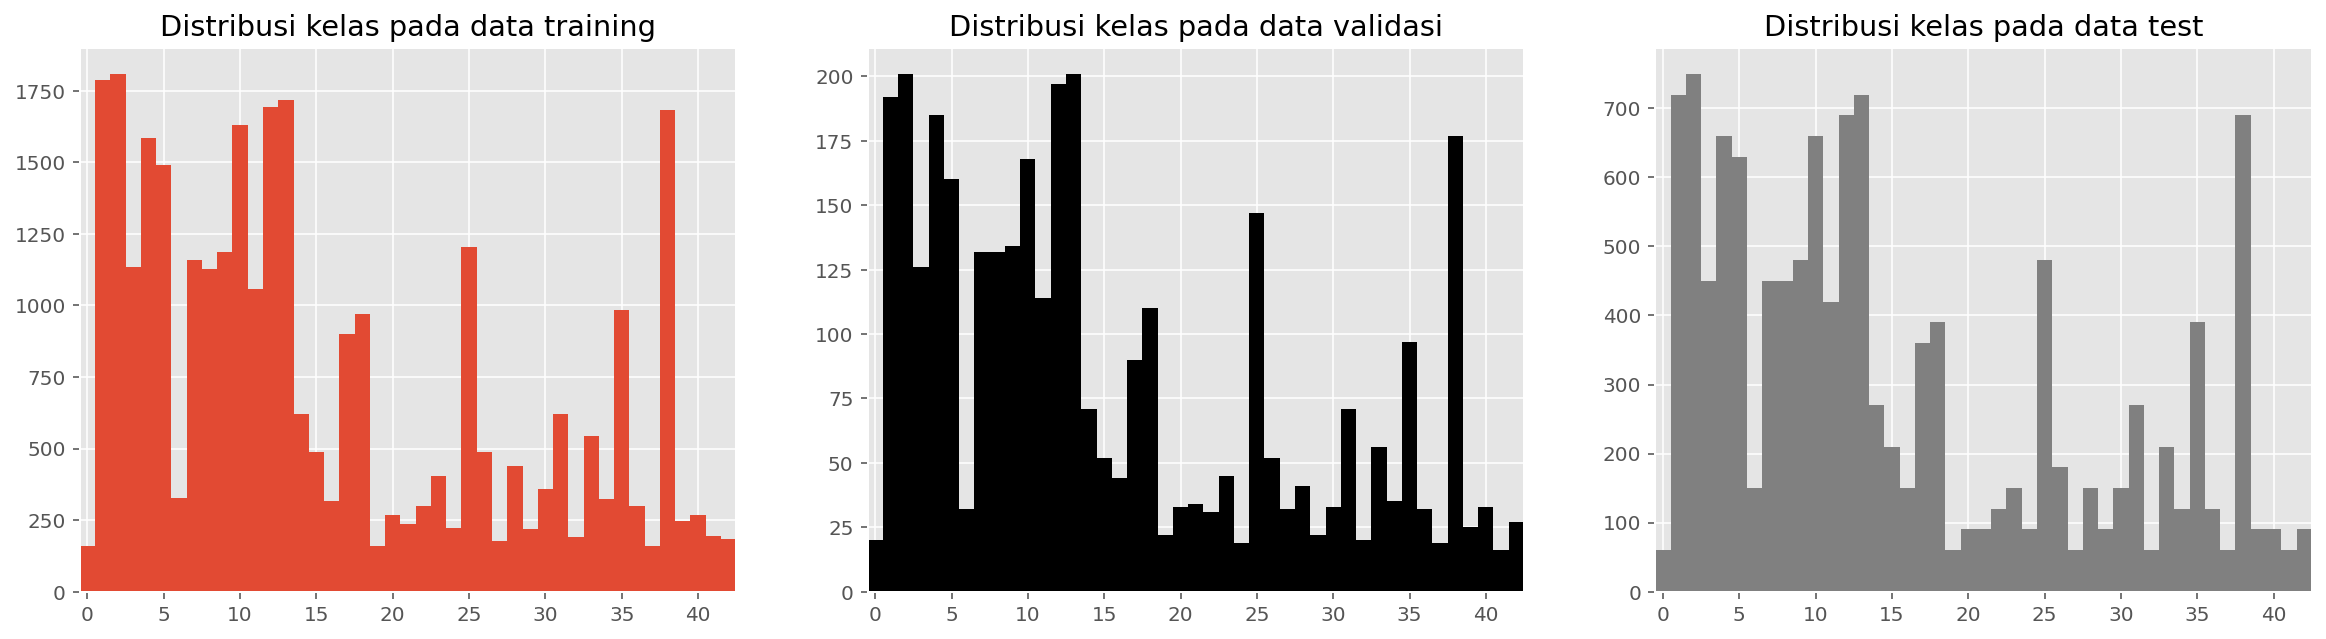

In [33]:
n_labels = np.unique(y_train).size
def hist_data(y_data, title=None, ax=None, **kwargs):
    if not ax :
        fig = plt.figure()
        ax = fig.add_subplot(111)
    ax.hist(y_data, np.arange(-0.5, n_labels+1.5), stacked=True, **kwargs)
    ax.set_xlim(-0.5, n_labels-0.5)
    if 'label' in kwargs : ax.legend()
    if title : ax.set_title(title)
        
fig,ax = plt.subplots(1,3, figsize=(20,5))
hist_data(y_train, title='Distribusi kelas pada data training', ax=ax[0])
hist_data(y_val, title='Distribusi kelas pada data validasi', ax=ax[1], color='black')
hist_data(y_test, title='Distribusi kelas pada data test', ax=ax[2], color='grey')

Dari gambar, **terlihat bahwa distribusi kelas masing-masing bagian data terlihat mirip. Oleh karena itu, kita tidak perlu melakukan proses normalisasi**. 

Tahap selanjutnya adalah Data Preparation. Pada tahap ini kita akan mengonversi label pada data training dan validasi dengan teknik **one hot encoding**. Tujuannya agar label, yang sebelumnya merupakan tipe data string menjadi fitur kategorik. Kita akan menggunakan fungsi to_categorical dari library tensorflow. Terapkan kode berikut:

In [34]:
# Konversi label dengan teknik one hot encoding
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43) 

Selesai! Sampai tahap ini, Anda telah mempersiapkan data sehingga **siap dimasukkan ke dalam model machine learning**. Selanjutnya, kita akan melakukan proses training dan testing dengan teknik deep learning. Yuk, lanjut ke materi berikutnya!

---

### Training dengan Convolutional Neural Network (CNN)
Di sini kita akan langsung implementasikan callback pada model. Kita set agar training berhenti saat akurasi model mencapai 96%. Penggunaan callback akan mempersingkat waktu training sebab kita sudah definisikan di awal berapa nilai akurasi yang dibutuhkan. Sehingga, saat model telah mencapai akurasi tersebut, proses training akan berhenti. 


In [27]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.96):
      print("\nAkurasi telah mencapai >96%. Stop training!")
      self.model.stop_training = True
callbacks = myCallback()

Usai menerapkan callbacks, saatnya kita membuat arsitektur model untuk proses training. 

---
Mari kita ingat kembali sebuah arsitektur Convolutional Network sederhana yang memiliki arsitektur lapisan (layer) Input-Convolutional-RELU-Pooling-FC. Berikut uraiannya:

- Lapisan Input akan menampung gambar sebagai array 3D dari nilai piksel.

- Lapisan Convolutional (konvolusi) akan menghitung perkalian (dot product) antara kernel dan sub-array dari gambar input yang berukuran sama dengan kernel. Sebagai contoh pada gambar berikut kita menggunakan kernel berukuran 3x3 dan melakukan proses perkalian antara kernel dan sub-array pada gambar masukan.

> Matriks kernel akan melintasi setiap piksel pada gambar secara berurutan dari kiri ke kanan dan atas ke bawah. Ia menghitung nilai output untuk setiap piksel yang dilintasi kernel dengan teknik perkalian matriks dot product. Kemudian, semua nilai yang dihasilkan dari proses perkalian dot product ini akan menjadi nilai piksel tunggal dari gambar keluaran. Proses ini diulang sampai seluruh gambar input terlewati oleh kernel.

- RELU atau Rectified Linear Activation Unit merupakan fungsi aktivasi linear untuk jaringan saraf tiruan. Ia telah menjadi fungsi aktivasi default karena model yang menggunakannya mencapai kinerja lebih baik dengan cepat.

> Ingatlah, fungsi aktivasi digunakan untuk memetakan hasil penjumlahan antara bobot dengan masukan (disebut sebagai weighted sum) menjadi nilai tertentu. Fungsi ini memungkinkan perceptron dapat menyesuaikan pola untuk data non linear.

> Nah, jika weighted sum ini bernilai positif, RELU akan mengembalikan nilainya secara langsung. Sebaliknya, jika nilainya negatif, RELU akan menghasilkan nilai nol. RELU didefinisikan sebagai:

> f(x) = max(0, x), dengan x adalah jaringan saraf masukan (weighted sum).

- Lapisan Pooling akan melakukan downsampling pada shape suatu gambar sehingga mengakibatkan pengurangan dimensi gambar. **Tujuannya adalah agar data komputasi yang dibutuhkan untuk memproses citra menjadi berkurang**.

> Pooling layer terdiri dari dua jenis, average pooling dan max pooling. Pada max pooling, setiap area dengan luas piksel tertentu akan diambil satu buah piksel yang memiliki nilai tertinggi. Sementara pada average pooling, nilai yang diambil adalah nilai rata-rata dari suatu area kernel.

> Lapisan pooling juga bertindak sebagai pengendali noise (gangguan). Namun, max pooling memiliki kinerja lebih baik dibanding dengan average pooling. **Oleh karena itu, max pooling lebih sering digunakan pada proses training CNN**. Kita juga akan menggunakannya dalam proyek ini.

- Lapisan FC (Fully-Connected) akan menghitung skor kelas untuk setiap kategori klasifikasi. Lapisan ini sama dengan jaringan saraf di mana setiap neuron terhubung ke semua neuron pada lapisan secara berurutan. Output akhir dihitung menggunakan softmax yang memberikan probabilitas setiap kelas untuk fitur yang diberikan.

> Untuk melewatkan gambar masukan ke lapisan FC, kita perlu melakukan proses flatten sehingga semua nilai piksel diatur dalam satu kolom. Flatten adalah proses mengubah data menjadi array 1 dimensi untuk dimasukkan ke lapisan berikutnya. Kita membuat output dari lapisan konvolusi menjadi satu vektor fitur yang panjang (flat). Kemudian, fitur yang telah melewati proses flatten diteruskan ke lapisan FC.

---

Pada proyek ini, kita menggunakan arsitektur 2 convolutional layer dan 1 fully connected layer. Untuk lebih jelasnya, mari kita bahas setiap layernya.
--
Pertama, inisialisasi model Sequential dan tentukan input shape untuk model. Set layer ini menggunakan kernel berukuran 5x5 untuk mempelajari fitur pada data traffic sign. Input masukan kita sesuaikan dengan shape X_train yaitu sebuah gambar RGB berukuran 32 pixels (32, 32, 3). Fungsi aktivasi yang akan kita gunakan adalah RELU, seperti yang telah dijelaskan sebelumnya. **Max Pooling layer juga kita tambahkan untuk mengurangi dimensi**

Di sini, kita juga menerapkan **dropout. Dropout merupakan salah satu hyperparameter yang bertujuan untuk mengurangi overfitting**. Ia bekerja dengan memutus atau menjatuhkan (drop) unit selama proses training neural network sehingga layer atau lapisannya menjadi tidak aktif. **Berdasarkan dokumentasi dari Keras, argumen rate untuk dropout adalah tipe data float antara 0 dan 1, yang merupakan bagian dari unit yang akan di-drop**. 

> Jika kita set dropout rate = 0.25, artinya, kita akan melepas 25% dari layer dan membuatnya menjadi tidak aktif selama proses training.

---

Berikut set layer kita yang pertama. Pada arsitektur ini, set parameter layer sebagai berikut:

- Ukuran filter untuk proses konvolusi=32
- Ukuran kernel=(5,5)
- Fungsi aktivasi RELU
- Pooling yang kita gunakan adalah Maxpool dengan ukuran 2,2
- Dropout rate sebesar 0.25

In [35]:
#layer pertama
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

In [36]:
#layer kedua
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

Kali ini, Anda tentu bisa langsung memahami arsitektur layer dan parameter yang digunakan pada layer kedua. Mari kita lanjut ke bagian fully connected layer.

In [37]:
#fully connected layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))

> Pada bagian ini, kita juga menerapkan Dense layer. **Dense layer merupakan lapisan saraf yang menerima input dari semua neuron pada lapisan sebelumnya**. Menurut dokumentasi keras, lapisan ini mengimplementasikan operasi matriks antara **(activation(dot(input, kernel) + bias)**. Fungsi aktivasi merupakan argumen untuk mendefinisikan fungsi aktivasi yang kita gunakan, dalam hal ini RELU. Sedangkan bias adalah vektor yang dibuat oleh layer dan hanya akan aktif jika kita definisikan sebelumnya (use_bias=true).

Selanjutnya, kita akan melakukan kompilasi model dan memanggil fungsi fit untuk memulai training. Implementasikan kode berikut.

In [39]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs =5
history = model.fit(X_train, y_train,  batch_size=32, epochs=epochs, validation_data=(X_val, y_val), callbacks= [callbacks])
#save the model
model.save('my_model.h5')

Epoch 1/5
979/979 [==============================] - 167s 170ms/step - loss: 0.2136 - accuracy: 0.9578 - val_loss: 0.1061 - val_accuracy: 0.9739
Epoch 2/5
979/979 [==============================] - ETA: 0s - loss: 0.1772 - accuracy: 0.9607
Akurasi telah mencapai >96%. Stop training!
979/979 [==============================] - 179s 183ms/step - loss: 0.1772 - accuracy: 0.9607 - val_loss: 0.0607 - val_accuracy: 0.9859


Ketahuilah, **hasil training pada machine learning tidak selalu sama**. Anda mungkin akan mendapat hasil akurasi tertentu yang diperoleh dengan lebih cepat atau lebih lambat. **Namun, secara umum, tidak akan terlalu jauh bedanya**. Jadi, tidak perlu khawatir, ya!

> **Perbedaan hasil ini bisa jadi disebabkan oleh perilaku dan kinerja algoritma machine learning yang bersifat stokastik**. Deep neural network dilatih menggunakan algoritma optimasi penurunan gradien stokastik. **Stokastik di sini mengacu pada proses yang melibatkan beberapa situasi acak (random) dan ketidakpastian (uncertainty)**. Sifat stokastik pada algoritma machine learning adalah konsep dasar yang penting dan harus dipahami oleh para praktisi machine learning. Tujuannya, agar kita dapat menafsirkan perilaku banyak model prediktif secara efektif. 

Terakhir, untuk mendapatkan grafik akurasi dan loss, terapkan kode berikut.

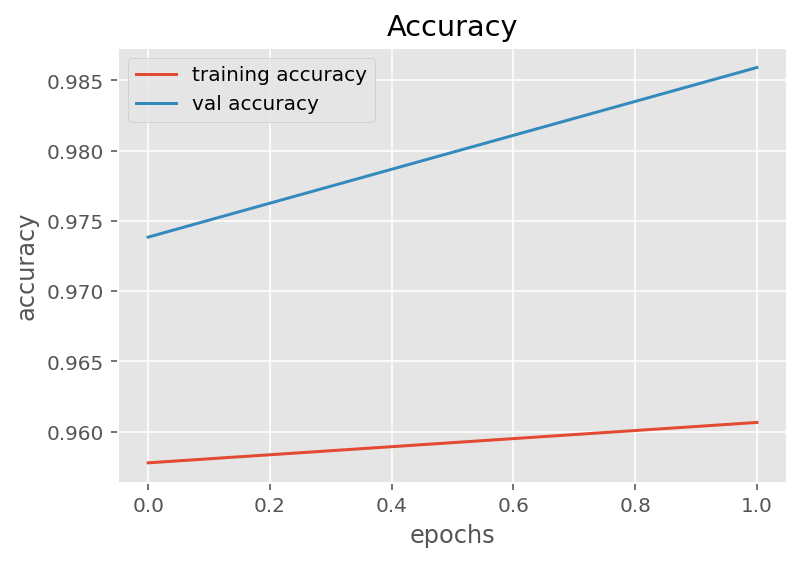

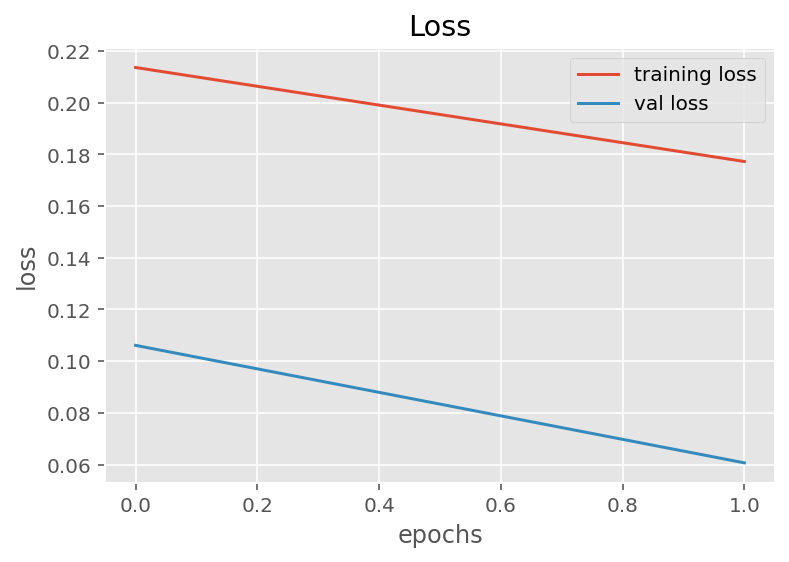

In [40]:
# Plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
 
# Plotting graphs for loss
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### Testing Model
Pada tahap eksplorasi data, kita membagi data menjadi tiga bagian, yaitu data training, validasi, dan testing. Setelah memperoleh hasil pada data training dan validasi, kita akan menguji model pada data yang belum pernah dilihat sebelumnya, yaitu data testing. Untuk mengujinya, implementasikan kode berikut.

In [41]:
# Testing accuracy with the test data
from sklearn.metrics import accuracy_score
 
pred=np.argmax(model.predict(X_test), axis=-1)
accuracy_score(y_test, pred)

395/395 [==============================] - 15s 39ms/step


0.9570071258907363

Selanjutnya, untuk memperoleh metrik klasifikasi lain seperti precision, recall, dan f1-score, mari kita terapkan fungsi classification_report dari library sklearn. 

In [42]:
# Calculate metrics for classification
from sklearn.metrics import classification_report
 
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        60
           1       0.95      0.98      0.97       720
           2       0.98      0.97      0.97       750
           3       0.99      0.90      0.94       450
           4       0.99      0.97      0.98       660
           5       0.83      0.98      0.90       630
           6       0.96      0.79      0.86       150
           7       0.94      0.96      0.95       450
           8       0.93      0.95      0.94       450
           9       0.96      1.00      0.98       480
          10       1.00      1.00      1.00       660
          11       0.91      0.94      0.93       420
          12       1.00      0.98      0.99       690
          13       1.00      0.99      0.99       720
          14       0.99      0.96      0.98       270
          15       0.98      0.99      0.99       210
          16       0.99      1.00      1.00       150
          17       0.99    

Jika diperhatikan pada hampir semua kelas, akurasi precision, recall, dan f1-score memiliki angka yang tinggi, rata-rata di atas 90-an. Namun, pada beberapa kelas seperti kelas dengan indeks 22 dan 41, akurasi rata-ratanya berada dibawah 80%. Hal ini bisa disebabkan oleh representasi fitur yang cukup kompleks dari kedua kelas ini.

---
Yay! Anda telah berhasil membuat model untuk mengklasifikasikan rambu lalu lintas!

---